In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('../dataset/dataset_preprocessed_numeric.csv', header=0, low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406431 entries, 0 to 406430
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   COMISARIA                 406431 non-null  int64
 1   DERIVADA_FISCALIA         406431 non-null  int64
 2   DIRECCION                 406431 non-null  int64
 3   DIST_CIA                  406431 non-null  int64
 4   DIST_HECHO                406431 non-null  int64
 5   DPTO_CIA                  406431 non-null  int64
 6   DPTO_HECHO                406431 non-null  int64
 7   EDAD                      406431 non-null  int64
 8   EST_CIVIL                 406431 non-null  int64
 9   LIBRO                     406431 non-null  int64
 10  MODALIDAD                 406431 non-null  int64
 11  PROV_CIA                  406431 non-null  int64
 12  PROV_HECHO                406431 non-null  int64
 13  REGION                    406431 non-null  int64
 14  SEXO                

In [4]:
x = dataset.drop('MODALIDAD', axis=1).values
y = dataset['MODALIDAD'].values

In [5]:
print(x)
print(y)

[[ 371    4  283 ...    1    1    4]
 [ 311    4  539 ...    1    1    4]
 [ 431    7 1181 ...    1    2    5]
 ...
 [ 918    4 1476 ...   12   26    3]
 [ 918    7 1476 ...   12   31    1]
 [ 937    4  676 ...   11   25    0]]
[2 2 2 ... 6 6 4]


### PCA

#### Matriz de covarianza

In [6]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [7]:
std = StandardScaler()
x_std = std.fit_transform(x)

In [8]:
pca = convers_pca(no_of_components=2)
pca.fit(x_std)

In [9]:
pca.eigen_vectors

array([[ 1.32093890e-01, -5.09487620e-02,  6.27947364e-03,
         2.34811251e-01,  2.26217398e-01,  4.24148048e-01,
         4.23332626e-01, -1.61254371e-02,  2.74813700e-02,
         4.46249143e-02,  4.07278401e-01,  4.05235901e-01,
         3.36758852e-01,  9.77430561e-04,  1.75081128e-02,
        -1.44625287e-01,  6.30594624e-02, -2.88237692e-02,
         1.57415162e-02,  8.67608765e-03,  1.44743427e-01,
         1.07959593e-03,  7.31800425e-03,  6.58242164e-04,
         1.43502474e-01, -2.48223068e-03,  5.38672991e-03,
        -3.21734565e-05],
       [ 8.25719274e-02,  7.48724265e-02, -7.62184940e-03,
         1.35903131e-01,  1.41337751e-01,  1.24018543e-01,
         1.21907544e-01, -1.16590169e-02, -5.02344657e-02,
         8.09626818e-02,  1.39577547e-01,  1.39516082e-01,
        -2.12479532e-01,  5.94618457e-03, -3.90998835e-02,
         4.73081236e-01,  9.31628819e-02,  1.34739763e-02,
         2.15716573e-02, -3.08445016e-02, -5.40387982e-01,
         5.28768730e-02, -1.34

In [10]:
pca.eigen_values

array([3.83077195, 2.77916302, 2.06961607, 1.81509462, 1.71267787,
       1.64516058, 1.39885244, 1.28362354, 0.04105267, 0.0158181 ,
       0.00521474, 0.00790646, 0.12934015, 0.25919872, 0.29311495,
       0.37504228, 0.47888571, 0.60974253, 0.7007288 , 0.78261956,
       0.83382019, 0.91552497, 1.04207894, 1.03287157, 0.96722807,
       0.98075639, 0.99465213, 0.99951191])

In [11]:
pca.sorted_components

array([ 0,  1,  2,  3,  4,  5,  6,  7, 22, 23, 27, 26, 25, 24, 21, 20, 19,
       18, 17, 16, 15, 14, 13, 12,  8,  9, 11, 10], dtype=int64)

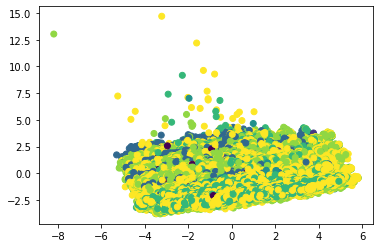

In [12]:
import matplotlib.pyplot as plt
transformed = pca.transform(x_std)
plt.figure()
plt.scatter(transformed[:, 0], transformed[:, 1], c=y)

#### Usando el módulo PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
m_pca = PCA(n_components=2)
m_pca.fit(x_std)
transformed = m_pca.transform(x_std)

In [15]:
print(x_std.shape)
print(transformed.shape)

(406431, 28)
(406431, 2)


Text(0, 0.5, 'PCA 2')

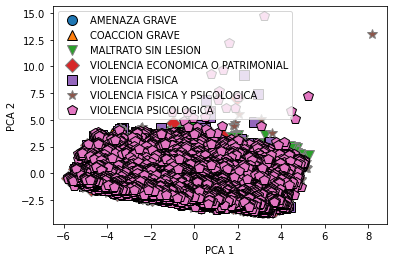

In [16]:
import mglearn
mglearn.discrete_scatter(transformed[:, 0], transformed[:, 1], y)
plt.legend(['AMENAZA GRAVE', 'COACCION GRAVE', 'MALTRATO SIN LESION',
       'VIOLENCIA ECONOMICA O PATRIMONIAL', 'VIOLENCIA FISICA',
       'VIOLENCIA FISICA Y PSICOLOGICA', 'VIOLENCIA PSICOLOGICA'], loc='best')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")